# Exercises 07

In [1]:
# import important modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## PANDAS exercises

You have important data about the COVID pandemic in Austria. [https://www.data.gv.at/katalog/dataset/covid-19-zeitliche-darstellung-von-daten-zu-covid19-fallen-je-bundesland]

The file containing this information is `CovidFaelle_Timeline.csv` (17.05.2021). The file is just plain text.
The data has multiple columns separated by ';'. You can observe that the first line indicate the name of each column.

In [2]:
covid_df = pd.read_csv('CovidFaelle_Timeline.csv', sep=';')

In [3]:
covid_df.head()

Time        Bundesland  BundeslandID  AnzEinwohner  \
0  26.02.2020 00:00:00        Burgenland             1        294436   
1  26.02.2020 00:00:00           Kärnten             2        561293   
2  26.02.2020 00:00:00  Niederösterreich             3       1684287   
3  26.02.2020 00:00:00    Oberösterreich             4       1490279   
4  26.02.2020 00:00:00          Salzburg             5        558410   

   AnzahlFaelle  AnzahlFaelleSum  AnzahlFaelle7Tage SiebenTageInzidenzFaelle  \
0             0                0                  0                        0   
1             0                0                  0                        0   
2             0                0                  0                        0   
3             0                0                  0                        0   
4             0                0                  0                        0   

   AnzahlTotTaeglich  AnzahlTotSum  AnzahlGeheiltTaeglich  AnzahlGeheiltSum  
0                  0             0                      0                 0  
1                  0             0                      0                 0  
2                  0             0                      0                 0  
3                  0             0                      0                 0  
4                  0             0                      0                 0

In [4]:
df = covid_df.copy()
df = df[df.BundeslandID == 10]
df_Austria = df.copy()
df.head()

Time  Bundesland  BundeslandID  AnzEinwohner  AnzahlFaelle  \
9   26.02.2020 00:00:00  Österreich            10       8901064             1   
19  27.02.2020 00:00:00  Österreich            10       8901064             2   
29  28.02.2020 00:00:00  Österreich            10       8901064             4   
39  29.02.2020 00:00:00  Österreich            10       8901064             1   
49  01.03.2020 00:00:00  Österreich            10       8901064             4   

    AnzahlFaelleSum  AnzahlFaelle7Tage SiebenTageInzidenzFaelle  \
9                 1                  1               0,01123461   
19                3                  3               0,03370384   
29                7                  7               0,07864229   
39                8                  8                0,0898769   
49               12                 12                0,1348154   

    AnzahlTotTaeglich  AnzahlTotSum  AnzahlGeheiltTaeglich  AnzahlGeheiltSum  
9                   0             0                      0                 0  
19                  0             0                      0                 0  
29                  0             0                      0                 0  
39                  0             0                      0                 0  
49                  0             0                      0                 0

### Remove columns

remove the following columns: `Bundesland`, `BundeslandID` and `AnzEinwohner`

In [5]:

### BEGIN SOLUTION
df.drop(['Bundesland', 'BundeslandID', 'AnzEinwohner'], axis = 1, inplace = True)
### END SOLUTION
df.head()

Time  AnzahlFaelle  AnzahlFaelleSum  AnzahlFaelle7Tage  \
9   26.02.2020 00:00:00             1                1                  1   
19  27.02.2020 00:00:00             2                3                  3   
29  28.02.2020 00:00:00             4                7                  7   
39  29.02.2020 00:00:00             1                8                  8   
49  01.03.2020 00:00:00             4               12                 12   

   SiebenTageInzidenzFaelle  AnzahlTotTaeglich  AnzahlTotSum  \
9                0,01123461                  0             0   
19               0,03370384                  0             0   
29               0,07864229                  0             0   
39                0,0898769                  0             0   
49                0,1348154                  0             0   

    AnzahlGeheiltTaeglich  AnzahlGeheiltSum  
9                       0                 0  
19                      0                 0  
29                      0                 0  
39                      0                 0  
49                      0                 0

In [6]:
# check results
assert (df.columns == ['Time', 'AnzahlFaelle', 'AnzahlFaelleSum',
       'AnzahlFaelle7Tage', 'SiebenTageInzidenzFaelle', 'AnzahlTotTaeglich',
       'AnzahlTotSum', 'AnzahlGeheiltTaeglich', 'AnzahlGeheiltSum']).all()


### Use the `pd.to_datetime` function and set a column as index

Change the `Time` column into a datetime object following the next line

```python
    df.Time = pd.to_datetime(df.Time, yearfirst = True, dayfirst = True)
```

and set the `Time` column as index

In [7]:

### BEGIN SOLUTION
df.Time = pd.to_datetime(df.Time, yearfirst = True, dayfirst = True)
df = df.set_index('Time')
### END SOLUTION
df.head()

AnzahlFaelle  AnzahlFaelleSum  AnzahlFaelle7Tage  \
Time                                                           
2020-02-26             1                1                  1   
2020-02-27             2                3                  3   
2020-02-28             4                7                  7   
2020-02-29             1                8                  8   
2020-03-01             4               12                 12   

           SiebenTageInzidenzFaelle  AnzahlTotTaeglich  AnzahlTotSum  \
Time                                                                   
2020-02-26               0,01123461                  0             0   
2020-02-27               0,03370384                  0             0   
2020-02-28               0,07864229                  0             0   
2020-02-29                0,0898769                  0             0   
2020-03-01                0,1348154                  0             0   

            AnzahlGeheiltTaeglich  AnzahlGeheiltSum  
Time                                                 
2020-02-26                      0                 0  
2020-02-27                      0                 0  
2020-02-28                      0                 0  
2020-02-29                      0                 0  
2020-03-01                      0                 0

In [8]:
# check results
assert df.index[0] == pd.Timestamp('2020-02-26')
assert df.index[5] == pd.Timestamp('2020-03-02')
### BEGIN HIDDEN TESTS
assert df.index[1] == pd.Timestamp('2020-02-27')
### END HIDDEN TESTS

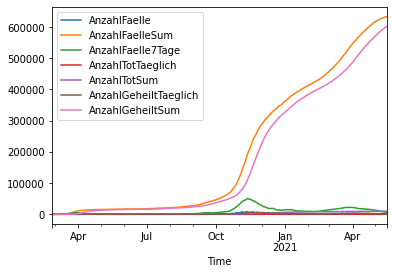

In [9]:
# check the dates quickly by plotting the data
df.plot()
plt.show()

## Create a dataframe containing specific information

actually, we only need 3 columns to recalculate the other columns:

- `AnzahlFaelle` (number of cases), 
- `AnzahlTotTaeglich` (number of deaths) and,
- `AnzahlGeheiltTaeglich` (number recovered)
    
overwrite the `df` Dataframe with those three columns


Hint: use indexing or the `.loc` function

In [10]:

### BEGIN SOLUTION
#df = df.loc[:,['AnzahlFaelle', 'AnzahlTotTaeglich', 'AnzahlGeheiltTaeglich']]
df = df[['AnzahlFaelle', 'AnzahlTotTaeglich', 'AnzahlGeheiltTaeglich']]
### END SOLUTION
df.head()

AnzahlFaelle  AnzahlTotTaeglich  AnzahlGeheiltTaeglich
Time                                                              
2020-02-26             1                  0                      0
2020-02-27             2                  0                      0
2020-02-28             4                  0                      0
2020-02-29             1                  0                      0
2020-03-01             4                  0                      0

In [11]:
# check results
assert (df.columns == ['AnzahlFaelle', 'AnzahlTotTaeglich', 'AnzahlGeheiltTaeglich']).all()


## Rename columns

Rename the columns named `AnzahlFaelle`, `AnzahlTotTaeglich` and `AnzahlGeheiltTaeglich` to `cases`, `deaths` and `recovered`, respectively

In [12]:
# let's change the column names
### BEGIN SOLUTION
#df = df.loc[:,['AnzahlFaelle', 'AnzahlTotTaeglich', 'AnzahlGeheiltTaeglich']]
df.columns = ['cases', 'deaths', 'recovered']
### END SOLUTION
df.head()

cases  deaths  recovered
Time                                
2020-02-26      1       0          0
2020-02-27      2       0          0
2020-02-28      4       0          0
2020-02-29      1       0          0
2020-03-01      4       0          0

In [13]:
# check results
assert (df.columns == ['cases', 'deaths', 'recovered']).all()


## Calculate the average cases up to `N` first days

Hint: Use the `.iloc` function

In [14]:
def avg_cases_first_N_days(df, N_days):

    ### BEGIN SOLUTION
    return df.iloc[:N_days]['cases'].mean()
    ### END SOLUTION

avg_cases_first_N_days(df, 10), avg_cases_first_N_days(df, 30)


(7.5, 243.13333333333333)

In [15]:
# check results
avg_cases_first_N_days(df, 10) == 7.5
### BEGIN HIDDEN TESTS
for i in range(15,20):
    np.testing.assert_almost_equal(avg_cases_first_N_days(df, i), df_Austria.iloc[:i]['AnzahlFaelle'].mean())
### END HIDDEN TESTS

## Select Data

select data in November (`2020-11`) and only columns `deaths` and `recovered`

Hint: Use the `.loc` function

In [16]:

def generate_nov_data_deaths_recovered(df):

    ### BEGIN SOLUTION
    return df.loc['2020-11', ['deaths', 'recovered']]
    ### END SOLUTION
df_nov = generate_nov_data_deaths_recovered(df)
# expecteed result
"""
            deaths  recovered
Time                         
2020-11-01      22       1428
2020-11-02      27       1834
2020-11-03      41       1741
2020-11-04      45       1988
2020-11-05      41       2149
2020-11-06      26       2446
2020-11-07      36       2445
2020-11-08      32       2310
2020-11-09      41       2598
2020-11-10      39       2416
2020-11-11      27       2412
2020-11-12      25       2302
"""
print(df_nov)

            deaths  recovered
Time                         
2020-11-01      32       1881
2020-11-02      38       2440
2020-11-03      53       2589
2020-11-04      55       2885
2020-11-05      59       2954
2020-11-06      43       4022
2020-11-07      68       3588
2020-11-08      50       3388
2020-11-09      72       4210
2020-11-10      64       4421
2020-11-11      75       4811
2020-11-12      80       5286
2020-11-13      93       6400
2020-11-14      83       6124
2020-11-15      81       5383
2020-11-16      92       6194
2020-11-17      96       6422
2020-11-18      83       6018
2020-11-19     100       6166
2020-11-20     112       7620
2020-11-21     102       6431
2020-11-22      86       5758
2020-11-23     105       6336
2020-11-24      95       6624
2020-11-25     110       5950
2020-11-26     104       5772
2020-11-27     109       6731
2020-11-28     107       5416
2020-11-29     100       5168
2020-11-30     111       5781


In [17]:
# check results
generate_nov_data_deaths_recovered(df).index[0] == pd.Timestamp('2020-11-01')
generate_nov_data_deaths_recovered(df).columns = ['deaths', 'recovered']
### BEGIN HIDDEN TESTS
#assert (generate_nov_data_deaths_recovered(df).deaths == [22, 27, 41, 45, 41, 26, 36, 32, 41, 39, 27, 25]).all()
### END HIDDEN TESTS

## Filter by date

Filter by a range of dates: `beginning` and `end`

Hint: Use the `.truncate` function

In [18]:
def filter_by_date(df, beginning, end):
    ### BEGIN SOLUTION
    return df.truncate(before=beginning, after=end)
    ### END SOLUTION
#expected result
"""
            cases  deaths  recovered
Time                                
2020-05-01     37       3        111
2020-05-02     28       2         79
2020-05-03     11       5         60
2020-05-04     30       3        151
2020-05-05     55       3        124
2020-05-06     46       4        119
2020-05-07     37       2        120
"""
print(filter_by_date(df, '2020-05-01', '2020-05-07'))

            cases  deaths  recovered
Time                                
2020-05-01     37       3        110
2020-05-02     28       2         80
2020-05-03     12       6         60
2020-05-04     30       3        151
2020-05-05     54       3        123
2020-05-06     46       4        118
2020-05-07     38       2        119


## Bar plot

plot bar plots of the average number of all 3 columns over months

Hint: Use `df.resample` function

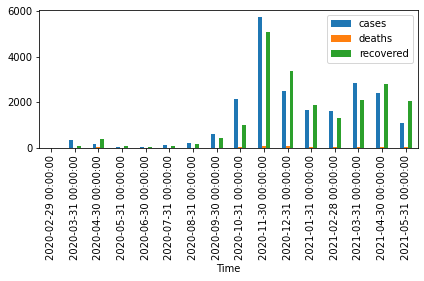

In [19]:
df.resample('M').mean().plot(kind = 'bar')
plt.tight_layout()
plt.savefig("bar_plot.png")
plt.show()

The result should look like this one
<img src="bar_plot.png" alt="Drawing" style="width: 600px;"/>

## Plot

Plot the average number of all 3 columns over weeks

Hint: Use `df.resample` function

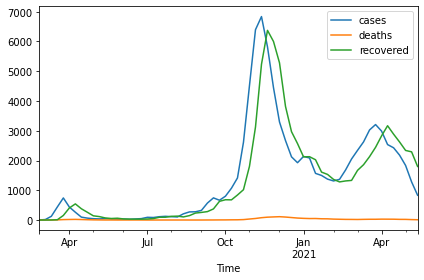

In [20]:
# plot the average number of all 3 columns over weeks
# use df.resemple function
df.resample('W').mean().plot()
plt.tight_layout()
plt.savefig("plot.png")
plt.show()

The result should look like this one
<img src="plot.png" alt="Drawing" style="width: 600px;"/>

## let's recalculate the original data

### Calculate the cumulative sums

make a new dataframe with cumulative sums (`df_cum_sum`)

In [21]:

# df_cum_sum = df.
### BEGIN SOLUTION
df_cum_sum = df.cumsum()
### END SOLUTION
# expected result
"""
            cases  deaths  recovered
Time                                
2020-02-26      1       0          0
2020-02-27      3       0          0
2020-02-28      7       0          0
             cases  deaths  recovered
Time                                 
2020-11-10  174270    1522      82708
2020-11-11  183433    1549      85120
2020-11-12  191024    1574      87422
"""
print(df_cum_sum.head(3))
print(df_cum_sum.tail(3))

            cases  deaths  recovered
Time                                
2020-02-26      1       0          0
2020-02-27      3       0          0
2020-02-28      7       0          0
             cases  deaths  recovered
Time                                 
2021-05-14  632261   10216     599168
2021-05-15  632956   10225     600674
2021-05-16  633465   10228     602022


In [22]:
# check your result
assert (df_cum_sum.values == df_Austria[['AnzahlFaelleSum', 'AnzahlTotSum', 'AnzahlGeheiltSum']]).all().all()

### Calculate the number of cases in the last 7 days

We are still missing the number of cases in last 7 days, let's calculate it (`df_7_days`)

#### Option 1

Use `df.rolling` function to calculate the rolling sum - and fix the first 6 days from the df_cum_sum

In [23]:

### BEGIN SOLUTION
df_7_days = pd.DataFrame(df['cases'].rolling(7).sum())
df_7_days.iloc[:6,0] = df_cum_sum.iloc[:6,0]
### END SOLUTION
#expected result
"""
Time
2020-02-26    1.0
2020-02-27    3.0
2020-02-28    7.0
Name: cases, dtype: float64
Time
2020-11-10    46634.0
2020-11-11    48677.0
2020-11-12    49330.0
Name: cases, dtype: float64
"""
print(df_7_days.head(3))
print(df_7_days.tail(3))

            cases
Time             
2020-02-26    1.0
2020-02-27    3.0
2020-02-28    7.0
             cases
Time              
2021-05-14  6439.0
2021-05-15  6063.0
2021-05-16  5830.0


In [24]:
assert (df_7_days.cases.values == df_Austria.AnzahlFaelle7Tage.values).all()

#### Option 2

add 7 rows at the beginning of the dataframe (fill them with 0s) and just use the rolling sum

In [25]:
### BEGIN SOLUTION
df_zeros = pd.DataFrame(np.zeros((7,1)), columns = ['cases'])
df_7_days = pd.concat([df_zeros, df[['cases']]]).rolling(7).sum().iloc[7:]
### END SOLUTION
#expected result
"""
Time
2020-02-26    1.0
2020-02-27    3.0
2020-02-28    7.0
Name: cases, dtype: float64
Time
2020-11-10    46634.0
2020-11-11    48677.0
2020-11-12    49330.0
Name: cases, dtype: float64
"""
print(df_7_days.head(3))
print(df_7_days.tail(3))

                     cases
2020-02-26 00:00:00    1.0
2020-02-27 00:00:00    3.0
2020-02-28 00:00:00    7.0
                      cases
2021-05-14 00:00:00  6439.0
2021-05-15 00:00:00  6063.0
2021-05-16 00:00:00  5830.0


In [26]:
# check result
assert (df_7_days.cases.values == df_Austria.AnzahlFaelle7Tage.values).all()

### Combine dataframes

Combine the three dataframes (`df`, `df_cum_sum`, `df_7_days`) into one

Use `pd.concat` (in this case you need to change the column names)
or `use df.join` in combination with `lsuffix` or `rsuffix` to change column names

```python
df_merged = pd.concat(...)

df_merged = df.join(...)
```

In [27]:

### BEGIN SOLUTION
df_merged = df.join(df_cum_sum, rsuffix = '_cum')
df_merged = df_merged.join(df_7_days, rsuffix = '_week')
### END SOLUTION

#expected result
"""
            cases  deaths  recovered  cases_cum  deaths_cum  recovered_cum  \
Time                                                                         
2020-02-26      1       0          0          1           0              0   
2020-02-27      2       0          0          3           0              0   
2020-02-28      4       0          0          7           0              0   

            cases_week  
Time                    
2020-02-26         1.0  
2020-02-27         3.0  
2020-02-28         7.0  
            cases  deaths  recovered  cases_cum  deaths_cum  recovered_cum  \
Time                                                                         
2020-11-10   7299      39       2416     174270        1522          82708   
2020-11-11   9163      27       2412     183433        1549          85120   
2020-11-12   7591      25       2302     191024        1574          87422   

            cases_week  
Time                    
2020-11-10     46634.0  
2020-11-11     48677.0  
2020-11-12     49330.0  
"""
print(df_merged.head(3))
print(df_merged.tail(3))

                     cases  deaths  recovered  cases_cum  deaths_cum  \
Time                                                                   
2020-02-26 00:00:00      1       0          0          1           0   
2020-02-27 00:00:00      2       0          0          3           0   
2020-02-28 00:00:00      4       0          0          7           0   

                     recovered_cum  cases_week  
Time                                            
2020-02-26 00:00:00              0         1.0  
2020-02-27 00:00:00              0         3.0  
2020-02-28 00:00:00              0         7.0  
                     cases  deaths  recovered  cases_cum  deaths_cum  \
Time                                                                   
2021-05-14 00:00:00    653       5       1817     632261       10216   
2021-05-15 00:00:00    695       9       1506     632956       10225   
2021-05-16 00:00:00    509       3       1348     633465       10228   

                     recovered_cu

## Final task: use this dataframe to make some nice plots

Free style